In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [85]:
observations=100000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)


(100000, 2)


In [86]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 13*xs +7*zs - 12+noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)


(100000, 1)


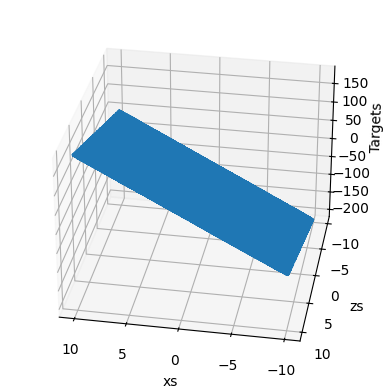

In [87]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [88]:
init_range= 0.01
weights = np.random.uniform(low=-init_range,high=init_range,size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range,size=1)
print(weights,biases)

[[-0.0088551 ]
 [ 0.00072085]] [0.00511665]


In [89]:
targets = targets.reshape(observations,1)
eta = 0.001
for i in range (100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets
  loss = np.sum(deltas**2)/2/observations
  print(loss)
  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T,deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3713.1359236673406
3474.4389975380604
3251.3716564311494
3042.9099128842413
2848.0968682525336
2666.0383172251313
2495.8986403225194
2336.8969655072924
2188.3035812765233
2049.436584759258
1919.658749422197
1798.374597995329
1685.0276671720399
1579.097951519067
1480.09951485493
1387.5782581246867
1301.10983351779
1220.297695247528
1144.7712780383395
1074.1842949538868
1008.2131467469848
946.5554354247478
888.9285752010359
835.0684944556309
784.7284227376033
737.6777572410007
693.7010035460228
652.596785760003
614.1769215112988
578.2655575470877
544.6983619644645
513.3217693643709
483.99227546098473
456.5757779063821
430.9469603025623
406.98871657131986
384.59161303781224
363.65338575693534
344.0784707734767
325.7775651583228
308.66721680434966
292.6694410977414
277.71136270392856
263.72488082270723
250.64635637489528
238.41631968363714
226.97919730760015
216.28305677127955
206.2793680198497
196.9227805028077
188.17091486245718
179.98416827036365
172.3255325176024
165.1604240232066
158.

In [90]:
print(weights,biases)

[[12.57257805]
 [ 6.76485266]] [-1.15156309]


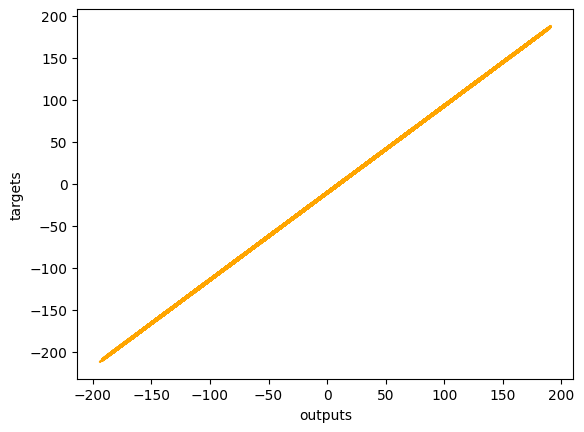

In [91]:
plt.plot(outputs,targets,color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()